In [439]:
import os
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import random as rd

# Setting up 

In [440]:
p_a = cv2.imread(os.path.join('input', 'pic_a.jpg'), cv2.IMREAD_COLOR) 
p_b = cv2.imread(os.path.join('input', 'pic_b.jpg'), cv2.IMREAD_COLOR) 

pt_3d_norm_file  = open("input/pts3d-norm.txt", "r")
pt_2d_norm_file  = open("input/pts2d-norm-pic_a.txt", "r")

pt_3d_norm =  np.array([[float(string.strip()) for string in i.split("  ") if string != ''] for i in pt_3d_norm_file])
pt_2d_norm =  np.array([[float(string.strip()) for string in i.split("  ") if string != ''] for i in pt_2d_norm_file])

pt_3d_norm_file.close()
pt_2d_norm_file.close()

##################

pt_3d_file = open("input/pts3d.txt", "r")
pts2d_b_file = open("input/pts2d-pic_b.txt", "r")
pts2d_a_file = open("input/pts2d-pic_a.txt", "r")

pt_3d =  np.array([[float(string.strip()) for string in i.split(" ") if string != ''] for i in pt_3d_file])
pts2d_b =  np.array([[float(string.strip()) for string in i.split(" ") if string != ''] for i in pts2d_b_file])
pts2d_a =  np.array([[float(string.strip()) for string in i.split(" ") if string != ''] for i in pts2d_a_file])

pt_3d_file.close()
pts2d_b_file.close()
pts2d_a_file.close()

##################

img_a = plt.imread("input/pic_a.jpg")
img_b = plt.imread("input/pic_b.jpg")


##################
M_answer = np.array([[-0.4583, 0.2947, 0.0139, -0.0040],[0.0509, 0.0546, 0.5410, 0.0524],[-0.1090, -0.1784, 0.0443, -0.5968]])
print(M_answer)

[[-0.4583  0.2947  0.0139 -0.004 ]
 [ 0.0509  0.0546  0.541   0.0524]
 [-0.109  -0.1784  0.0443 -0.5968]]


## 3.1.a

In [441]:
A = np.zeros((len(pt_3d_norm) * 2, 11))
B = pt_2d_norm.flatten()
for i in range(len(pt_3d_norm)):
    x = pt_3d_norm[i][0]
    y = pt_3d_norm[i][1]
    z = pt_3d_norm[i][2]
    
    u = pt_2d_norm[i][0]
    v = pt_2d_norm[i][1]
    
    A[i * 2] = [x, y, z, 1, 0, 0, 0, 0, -u * x, -u*y, -u * z]
    A[i * 2 + 1] = [0, 0, 0, 0, x, y, z, 1,  -v * x, -v*y, -v * z] # I am stupid...... staright up stupid.....
M_ls = np.linalg.lstsq(A, B)
M_ls_ex = np.append(M_ls[0], 1)
M = np.reshape(M_ls_ex, (3,4))
print(M * -0.5968)
print(M)
print(M_ls[1])


[[-0.45825785  0.29472847  0.01396382 -0.00402509]
 [ 0.05085536  0.05458821  0.54101312  0.05237325]
 [-0.10900561 -0.17834125  0.04427804 -0.5968    ]]
[[ 0.76785834 -0.49384797 -0.02339781  0.00674445]
 [-0.0852134  -0.09146818 -0.90652332 -0.08775678]
 [ 0.18265016  0.29882917 -0.07419242  1.        ]]
[0.00013094]


/anaconda3/envs/cv/lib/python3.7/site-packages/ipykernel/__main__.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


## 3.1.b

In [442]:
k_list = [8, 12, 16]
M_list = []
M_res_list = []
res_size = 4
for i in range(10):
    for k in k_list:
        
        sample_aray = rd.sample(range(len(pt_3d)), k)
        test_array = rd.sample([i for i in range(len(pt_3d)) if i not in sample_aray], res_size)
        
        pt3d_sample = pt_3d[sample_aray]
        pt2d_sample = pts2d_b[sample_aray]
        
        pt3d_test = pt_3d[test_array]
        pt2d_test = pts2d_b[test_array]
        
        A = np.zeros((len(pt3d_sample) * 2, 11))
        B = pt2d_sample.flatten()
        
        for i in range(len(pt3d_sample)):
            x = pt3d_sample[i][0]
            y = pt3d_sample[i][1]
            z = pt3d_sample[i][2]

            u = pt2d_sample[i][0]
            v = pt2d_sample[i][1]

            A[i * 2] = [x, y, z, 1, 0, 0, 0, 0, -u * x, -u*y, -u * z]
            A[i * 2 + 1] = [0, 0, 0, 0, x, y, z, 1,  -v * x, -v*y, -v * z] 

        M_ls = np.linalg.lstsq(A, B)
        M_ls_ex = np.append(M_ls[0], 1)
        M = np.reshape(M_ls_ex, (3,4))
        M_list.append(M)
        
        residual = 0
        for i in range(res_size):
            pt_test = np.matmul(M,np.append(pt3d_sample[i], 1))
            residual += np.linalg.norm(np.array([pt_test[0]/pt_test[2], pt_test[1]/pt_test[2]]) - pt2d_sample[i])
        M_res_list.append(residual)

M = M_list[np.argmin(M_res_list)]
print(M)
residual = 0
for i in range(len(pt_3d)):
    pt = np.matmul(M,np.append(pt_3d[i], 1))
    residual += np.linalg.norm(pts2d_b[i] - np.array([pt[0]/pt[2], pt[1]/pt[2]]))
print(residual)


[[-2.04466892e+00  1.18670631e+00  3.98143711e-01  2.43087352e+02]
 [-4.57803582e-01 -3.01089275e-01  2.15014614e+00  1.65838869e+02]
 [-2.24730158e-03 -1.09540044e-03  5.80791755e-04  1.00000000e+00]]
16.05688662115346


/anaconda3/envs/cv/lib/python3.7/site-packages/ipykernel/__main__.py:31: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


## 3.1.c

In [443]:
m4 = M[:,3]
Q = M[:,0:3]
C = - np.matmul(np.linalg.inv(Q), m4)
print(C)

[303.10541502 307.19445671  30.42436563]


## 3.2.a

In [444]:
A = np.zeros((len(pts2d_a), 8))
B = np.full(len(pts2d_a), -1)
for i in range(len(pts2d_a)):
    a = pts2d_a[i][0]
    b = pts2d_a[i][1]
    
    u = pts2d_b[i][0]
    v = pts2d_b[i][1]
    
    A[i] = [u*a, u*b, u, v*a, v*b, v, a, b]
    
F_a_ls = np.linalg.lstsq(A, B)
F_a_ls_ex = np.append(F_a_ls[0], 1)
F_a = np.reshape(F_a_ls_ex, (3,3))
print(F_a)

[[-6.60675944e-07  7.90642197e-06 -1.88480992e-03]
 [ 8.82674944e-06  1.21863596e-06  1.72276843e-02]
 [-9.08539064e-04 -2.64201801e-02  1.00000000e+00]]


/anaconda3/envs/cv/lib/python3.7/site-packages/ipykernel/__main__.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [445]:
A = np.zeros((len(pts2d_b), 8))
B = np.full(len(pts2d_b), -1)
for i in range(len(pts2d_b)):
    a = pts2d_b[i][0]
    b = pts2d_b[i][1]
    
    u = pts2d_a[i][0]
    v = pts2d_a[i][1]
    
    A[i] = [u*a, u*b, u, v*a, v*b, v, a, b]
    
F_b_ls = np.linalg.lstsq(A, B)
F_b_ls_ex = np.append(F_b_ls[0], 1)
F_b = np.reshape(F_b_ls_ex, (3,3))
print(F_b)

[[-6.60675944e-07  8.82674944e-06 -9.08539064e-04]
 [ 7.90642197e-06  1.21863596e-06 -2.64201801e-02]
 [-1.88480992e-03  1.72276843e-02  1.00000000e+00]]


/anaconda3/envs/cv/lib/python3.7/site-packages/ipykernel/__main__.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


## 3.2.b

In [446]:
u, s, v = np.linalg.svd(F)
s[-1] = 0
F = np.matmul(np.matmul(u ,np.diag(s)),v)
print(F)

[[-5.35883058e-07  7.89972529e-06 -1.88480998e-03]
 [ 8.83820595e-06  1.21802118e-06  1.72276843e-02]
 [-9.08539027e-04 -2.64201801e-02  1.00000000e+00]]


## 3.2.c

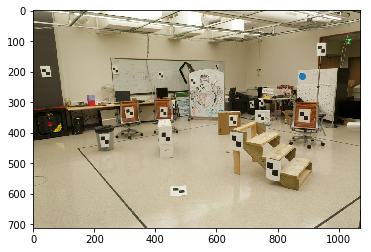

In [447]:
plt.imshow(img_a)
plt.scatter(pts2d_a[0,0], pts2d_a[0,1])

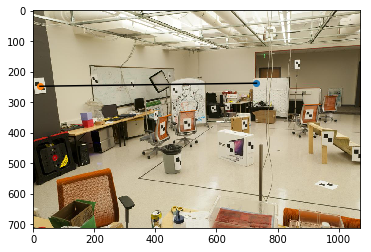

In [448]:
plt.imshow(img_b)
plt.scatter(pts2d_b[0,0], pts2d_b[0,1])
plt.scatter(pts2d_b[1,0], pts2d_b[1,1])
# plt.scatter(pts2d_b[2,0], pts2d_b[2,1])
plt.plot(pts2d_b[:2, 0], pts2d_b[:2, 1], 'k-')

In [449]:
Pul = np.array([0,0,1])
Pbl = np.array([0,img_b.shape[0],1])
ll = np.cross(Pul, Pbl)

Pur = np.array([img_b.shape[1], 0,1])
Pbr = np.array([img_b.shape[1],img_b.shape[0],1])
lr = np.cross(Pur, Pbr)
print(ll)
print(lr)

[-712    0    0]
[  -712      0 763264]


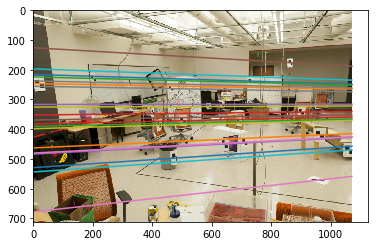

In [450]:
plt.imshow(img_b)
for i in range(len(pts2d_a)):
    pa = np.append(pts2d_a[i], 1)
    lb = np.matmul(F_a, pa)
    ptr = np.cross(lr, lb)
    ptl = np.cross(ll, lb)
    ptr = np.array([ptr[0]/ptr[2], ptr[1]/ptr[2]])
    ptl = np.array([ptl[0]/ptl[2], ptl[1]/ptl[2]])
    plt.plot([ptr[0], ptl[0]], [ptr[1], ptl[1]])


In [451]:
Pul = np.array([0,0,1])
Pbl = np.array([0,img_a.shape[0],1])
ll = np.cross(Pul, Pbl)

Pur = np.array([img_a.shape[1], 0,1])
Pbr = np.array([img_a.shape[1],img_a.shape[0],1])
lr = np.cross(Pur, Pbr)
print(ll)
print(lr)

[-712    0    0]
[  -712      0 763264]


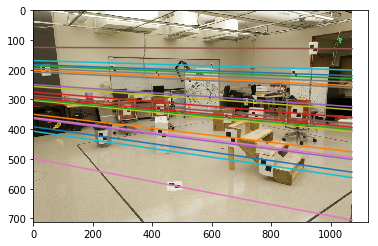

In [452]:
plt.imshow(img_a)
for i in range(len(pts2d_b)):
    pb = np.append(pts2d_b[i], 1)
    la = np.matmul(F_b, pb)
    ptr = np.cross(la, lr)
    ptl = np.cross(la, ll)
    ptr = np.array([ptr[0]/ptr[2], ptr[1]/ptr[2]])
    ptl = np.array([ptl[0]/ptl[2], ptl[1]/ptl[2]])
    plt.plot([ptr[0], ptl[0]], [ptr[1], ptl[1]])

## 3.2.e